<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# GitHub - Get Traffic Views on repository

**Tags:** #github #api #traffic #views #plotly #linechart #analytics

**Author:** [Florent Ravenel](https://www.linkedin.com/in/florent-ravenel/)

**Description:** This notebook will show how to get traffic views on a GitHub repository.

<u>References:</u>
- [GitHub API Documentation](https://developer.github.com/v3/)
- [GitHub Traffic API Documentation](https://developer.github.com/v3/repos/traffic/)

## Input

### Import libraries

In [1]:
import requests
import naas
from pprint import pprint
import pandas as pd
import plotly.graph_objects as go

### Setup Variables
- Create your personal access token [here](https://github.com/settings/tokens)
- Select all scopes on "repo" section

In [2]:
repo_url = "https://github.com/jupyter-naas/awesome-notebooks"
token = naas.secret.get("GITHUB_TOKEN") or "GITHUB_TOKEN"

## Model

### Get Traffic Views

This function will get the traffic views of a GitHub repository.

In [3]:
def get_traffic_views(repo_url, token):
    # owner + name of the repository
    owner = repo_url.split("/")[-2]
    name = repo_url.split("/")[-1]
    url = f"https://api.github.com/repos/{owner}/{name}/traffic/views"
    headers = {"Authorization": f"token {token}"}
    response = requests.get(url, headers=headers)
    return response.json()


traffic_views = get_traffic_views(repo_url, token)
pprint(traffic_views)

{'count': 2196,
 'uniques': 301,
 'views': [{'count': 73, 'timestamp': '2023-02-02T00:00:00Z', 'uniques': 25},
           {'count': 125, 'timestamp': '2023-02-03T00:00:00Z', 'uniques': 34},
           {'count': 131, 'timestamp': '2023-02-04T00:00:00Z', 'uniques': 25},
           {'count': 104, 'timestamp': '2023-02-05T00:00:00Z', 'uniques': 22},
           {'count': 167, 'timestamp': '2023-02-06T00:00:00Z', 'uniques': 38},
           {'count': 112, 'timestamp': '2023-02-07T00:00:00Z', 'uniques': 34},
           {'count': 270, 'timestamp': '2023-02-08T00:00:00Z', 'uniques': 34},
           {'count': 61, 'timestamp': '2023-02-09T00:00:00Z', 'uniques': 25},
           {'count': 170, 'timestamp': '2023-02-10T00:00:00Z', 'uniques': 31},
           {'count': 106, 'timestamp': '2023-02-11T00:00:00Z', 'uniques': 9},
           {'count': 162, 'timestamp': '2023-02-12T00:00:00Z', 'uniques': 17},
           {'count': 181, 'timestamp': '2023-02-13T00:00:00Z', 'uniques': 24},
           {'count': 1

## Output

### Display data

In [6]:
print("-> Git views on the last 14 days")
print(f"Views count: {traffic_views.get('count')}")
print(f"Uniques viewer: {traffic_views.get('uniques')}")

df = pd.DataFrame(traffic_views.get("views"))
df

-> Git views on the last 14 days
Views count: 2196
Uniques viewer: 301


,timestamp,count,uniques
0,2023-02-02T00:00:00Z,73,25
1,2023-02-03T00:00:00Z,125,34
2,2023-02-04T00:00:00Z,131,25
3,2023-02-05T00:00:00Z,104,22
4,2023-02-06T00:00:00Z,167,38
5,2023-02-07T00:00:00Z,112,34
6,2023-02-08T00:00:00Z,270,34
7,2023-02-09T00:00:00Z,61,25
8,2023-02-10T00:00:00Z,170,31
9,2023-02-11T00:00:00Z,106,9


### Display graph

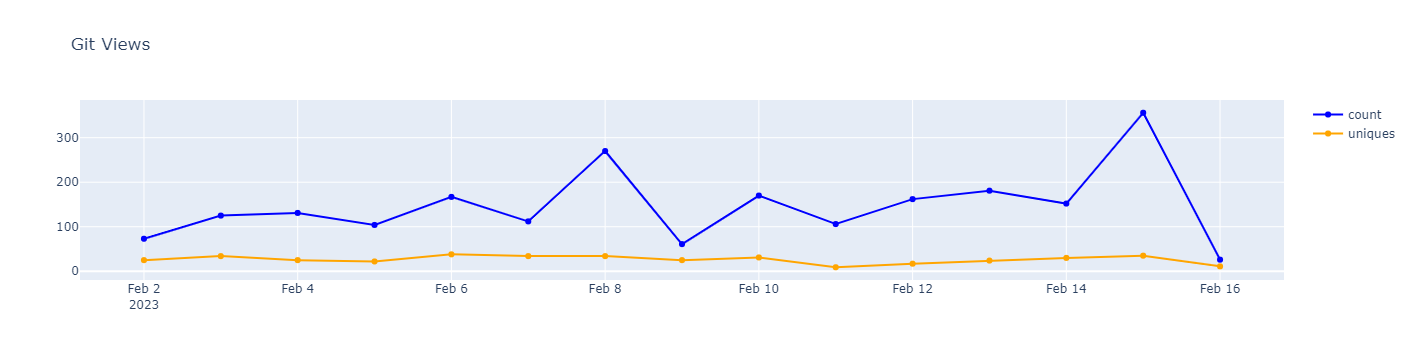

In [8]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        name="count",
        x=df["timestamp"],
        y=df["count"],
        mode="lines+markers",
        marker=dict(color="blue"),
    )
)
fig.add_trace(
    go.Scatter(
        name="uniques",
        x=df["timestamp"],
        y=df["uniques"],
        mode="lines+markers",
        marker=dict(color="orange"),
    )
)
fig.update_layout(title="Git Views")
fig.show()